<div class='alert alert-success'>
    <h1 align="center">Chapter 8: Unsupervised Learning: Clustering</h1> 
    <h3 align="center">Machine Learning Course (Fall 2018)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ml-2018/'>ML2018</a></h5>
</div>

## Contents

- Unsupervided learning
- Clustering
- K-Means clustering
- Elbow method to find `K`
- Some applications
- Other important clustering methods

In [22]:
%matplotlib inline

import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# our modules
from utils import *
from plot_utils import *

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
# matplotlib setup
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['image.cmap'] = 'Spectral'

## Clustering

Clustering is the task of gathering samples into groups of similar
samples according to some predefined similarity or distance (dissimilarity)
measure, such as the Euclidean distance.

<img src="http://www.snrazavi.ir/imgs/clustering.png" width="70%"/>

### Some applications

- Compression for data reduction
- Summarizing data as a reprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction

### Generate data

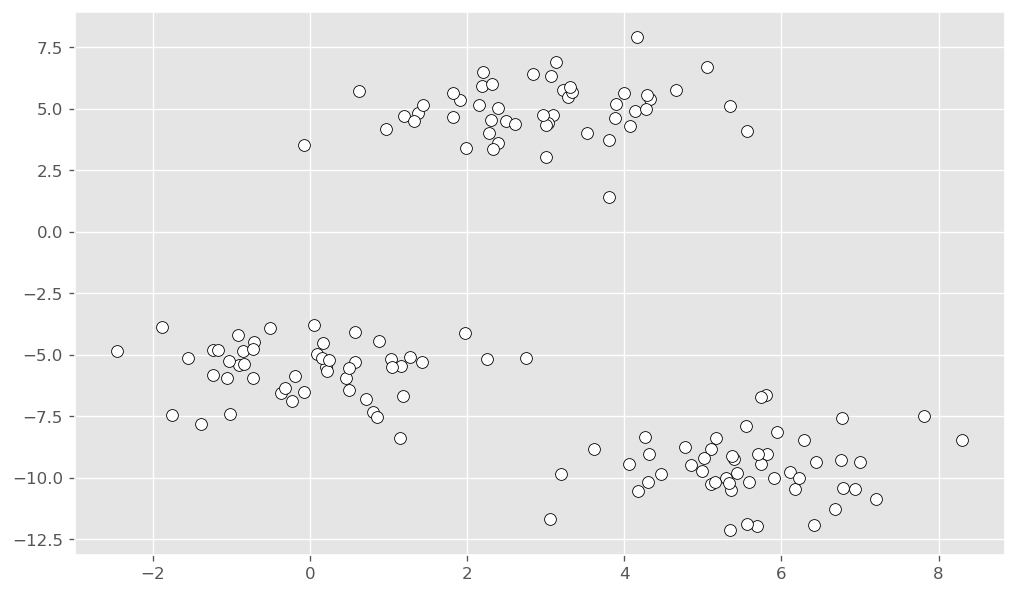

In [24]:
# create random data
X, y = make_blobs(n_samples=150, centers=3, cluster_std=1.2, random_state=10)

# plot data
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', s=50, c='w');

## K-Means Clustering using scikit-learn

In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
print(labels)

[0 1 1 0 0 1 0 1 2 2 1 1 0 2 1 1 1 2 1 0 2 2 0 2 0 2 2 0 1 1 2 2 0 1 2 0 2
 1 2 1 0 0 1 1 2 0 1 1 0 1 1 0 0 2 2 2 0 2 1 1 1 2 1 2 0 2 0 2 0 0 0 2 2 2
 0 2 2 2 0 1 2 0 2 0 1 0 1 0 1 0 0 2 2 1 1 1 0 1 0 0 2 2 2 0 1 1 2 1 2 1 1
 0 1 1 2 2 2 1 2 0 0 0 0 2 1 1 2 2 1 2 0 2 0 1 2 0 0 0 1 0 2 1 0 1 1 1 0 0
 2 0]


Let's visualize the assignments that have been found

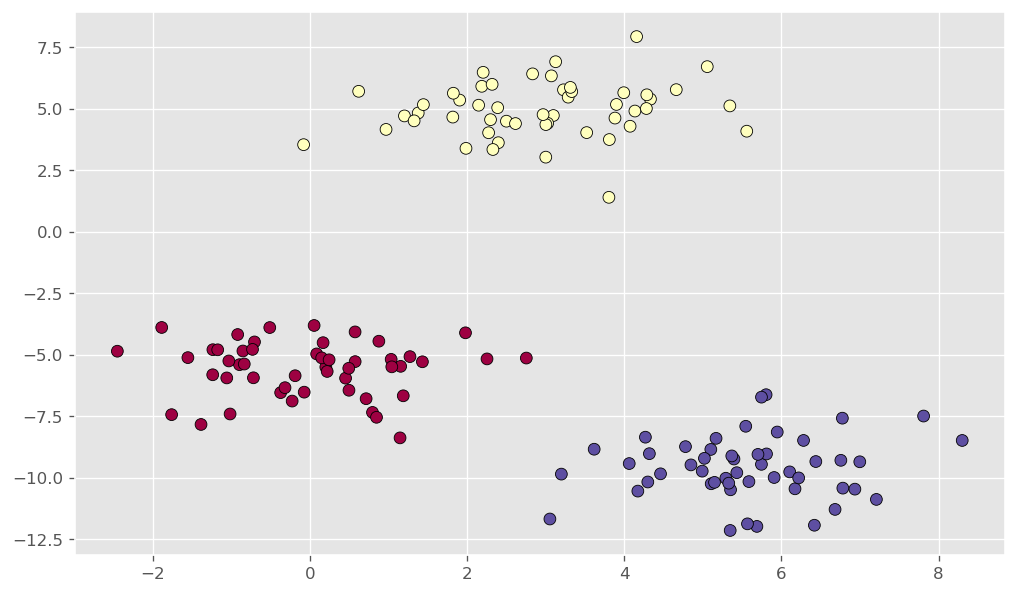

In [26]:
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', s=50, c=labels);

## K-Means Clustering: implementation

Here, we normalize data for better visualization.

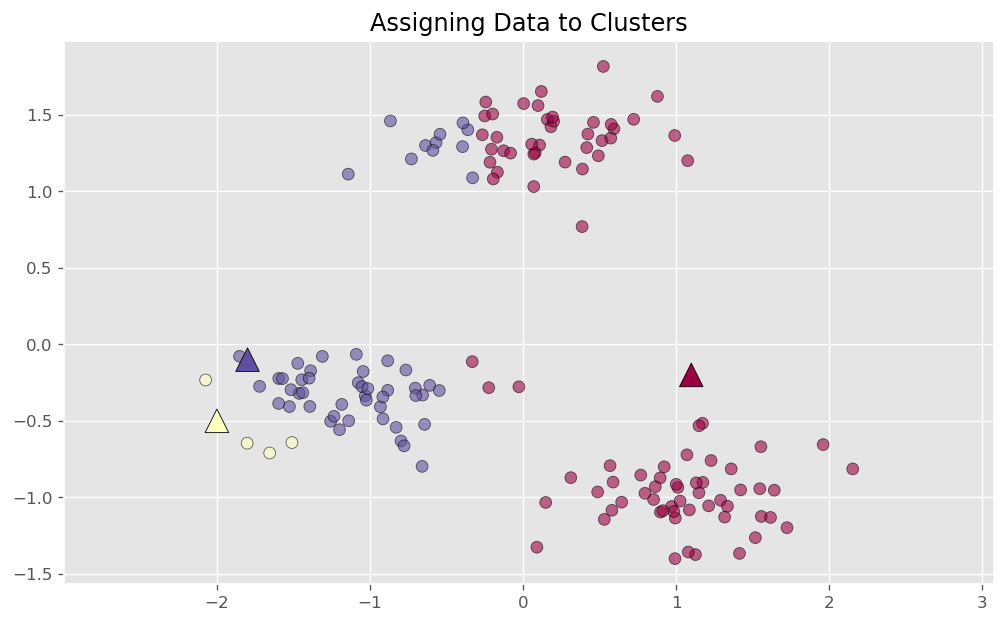

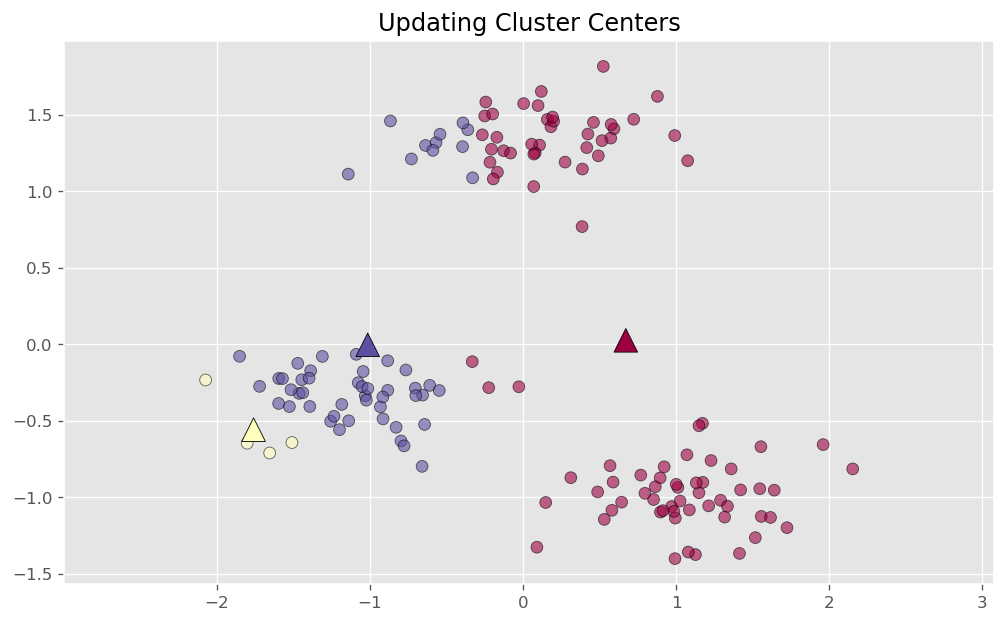

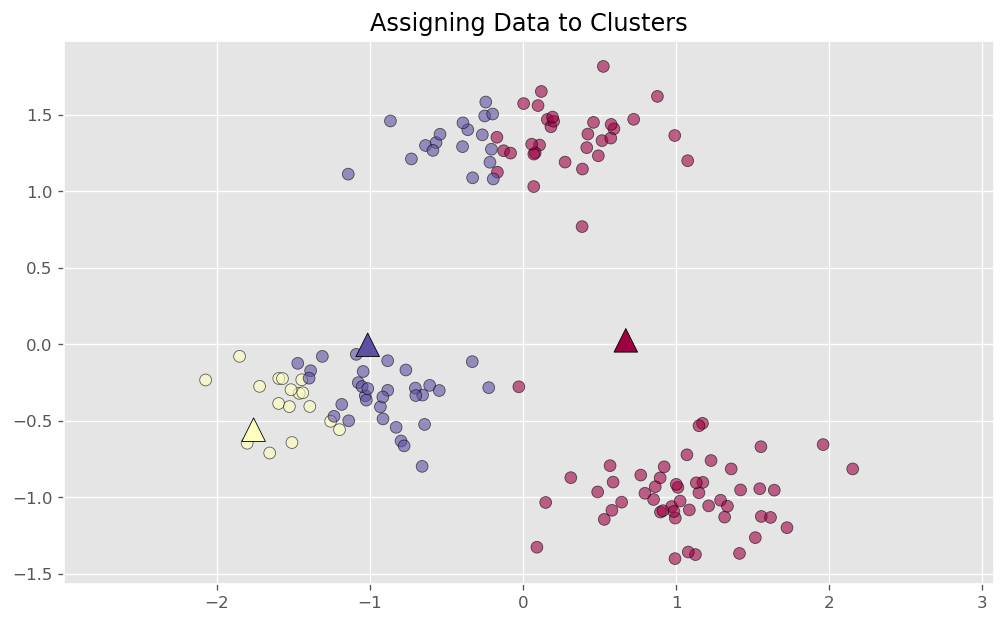

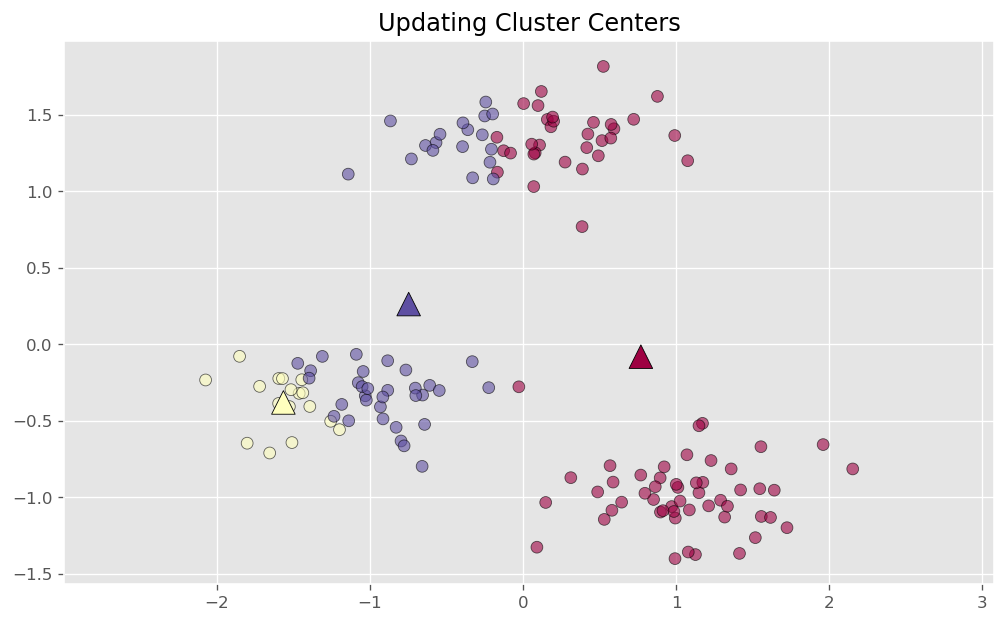

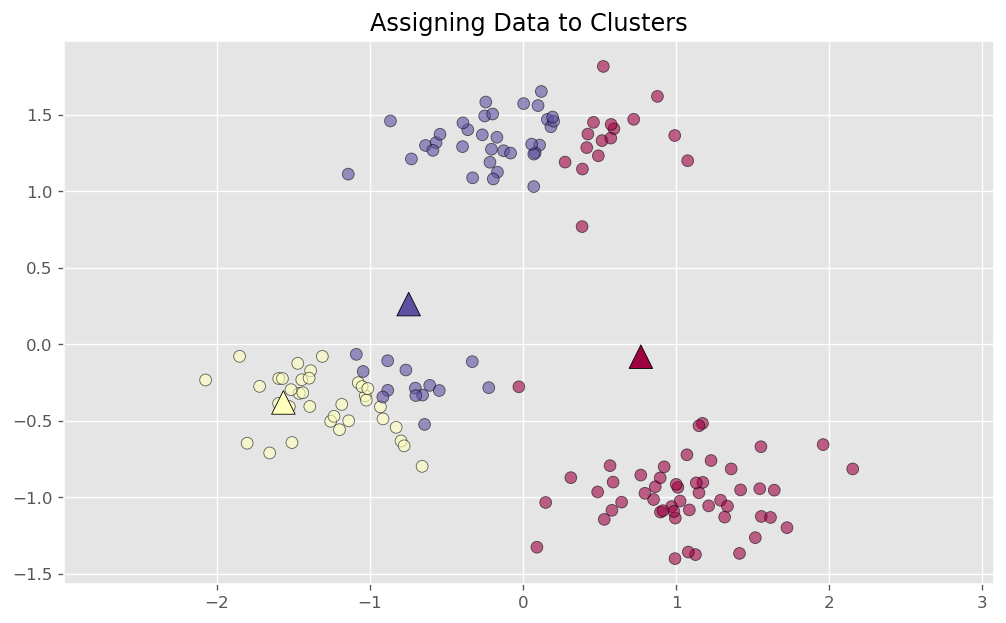

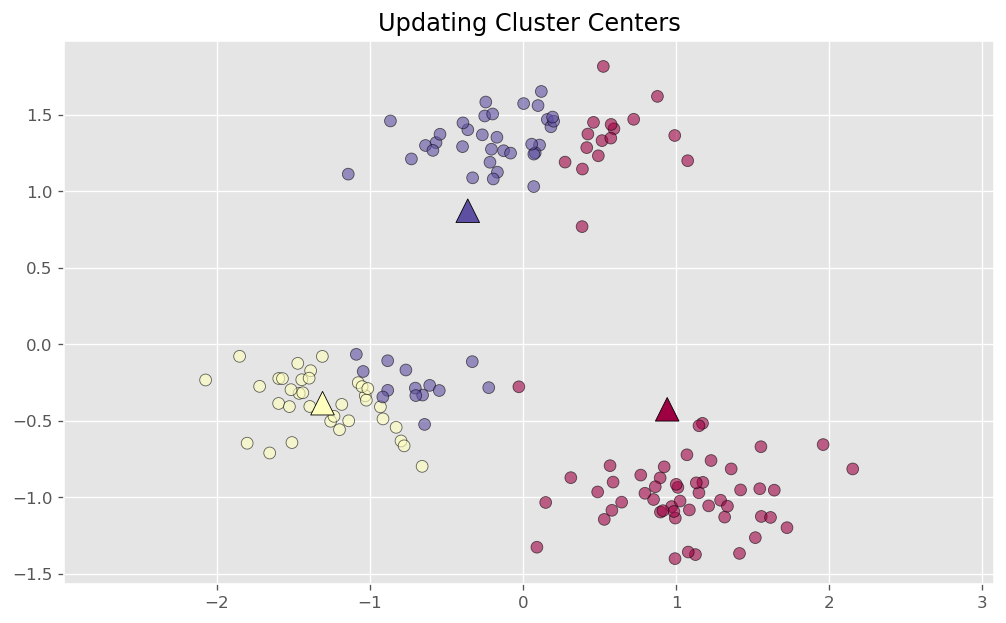

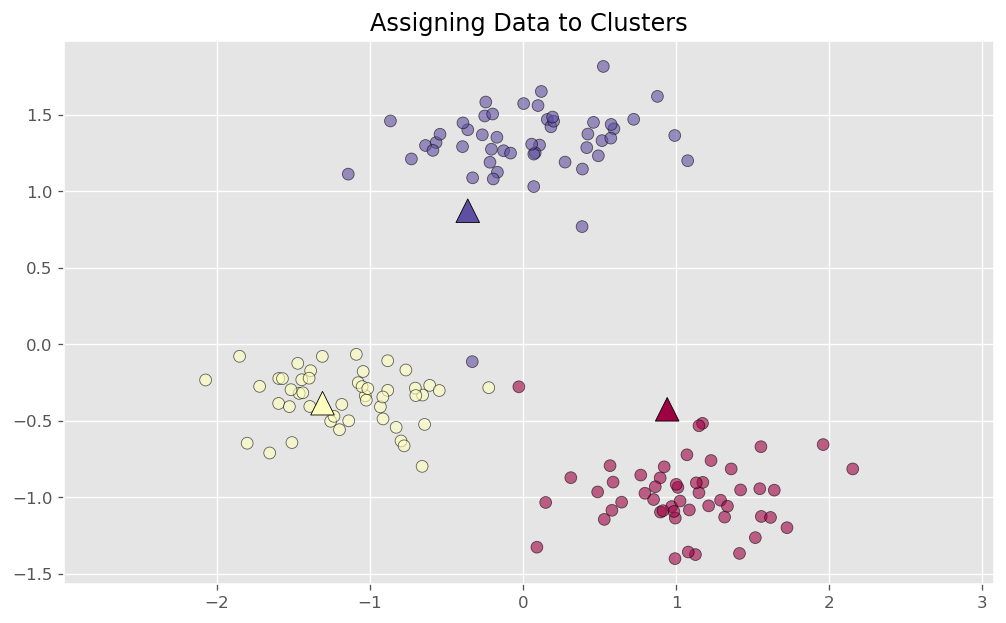

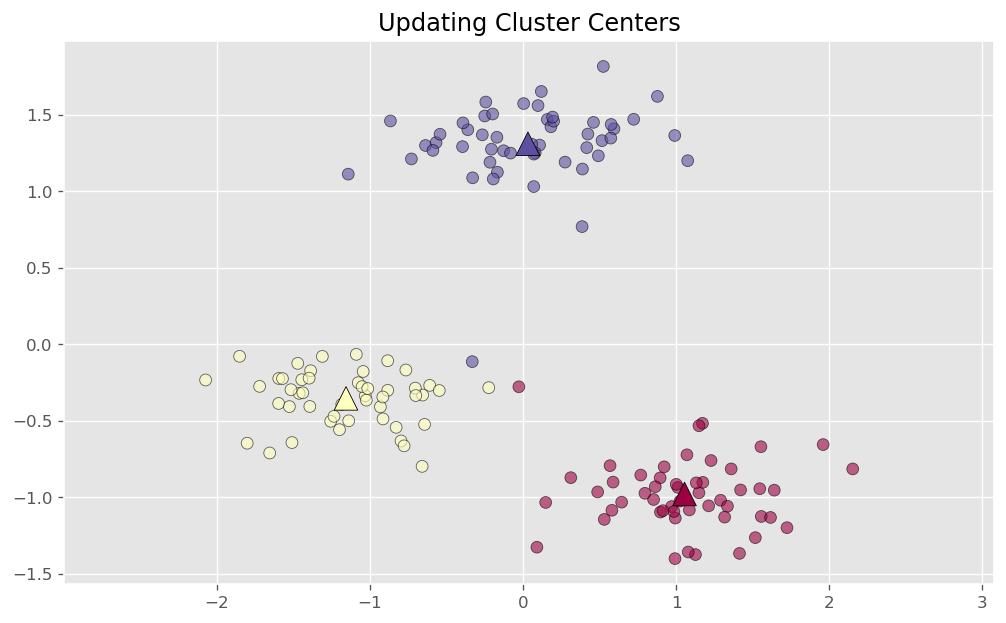

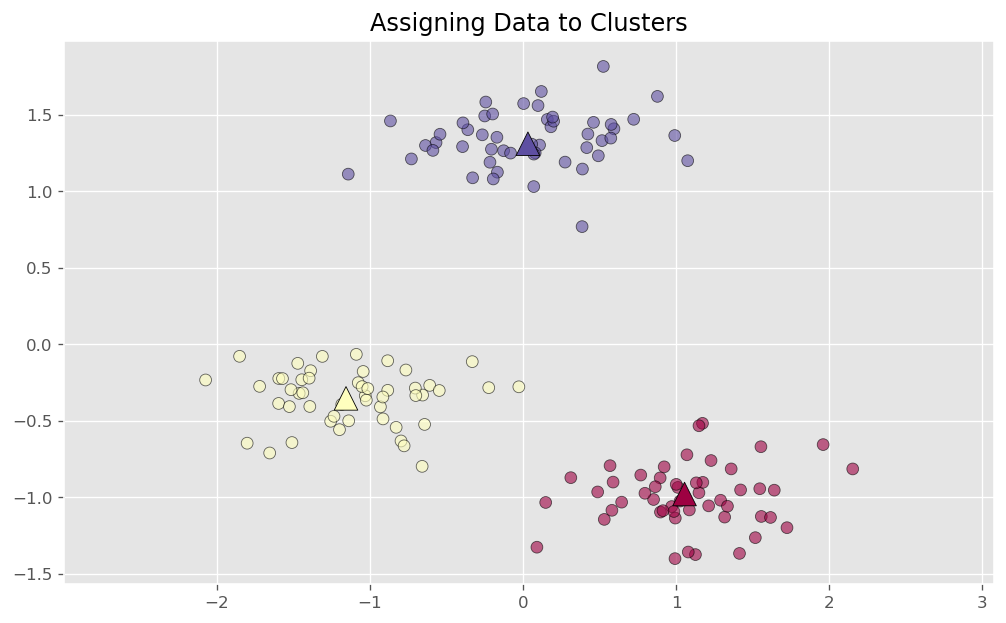

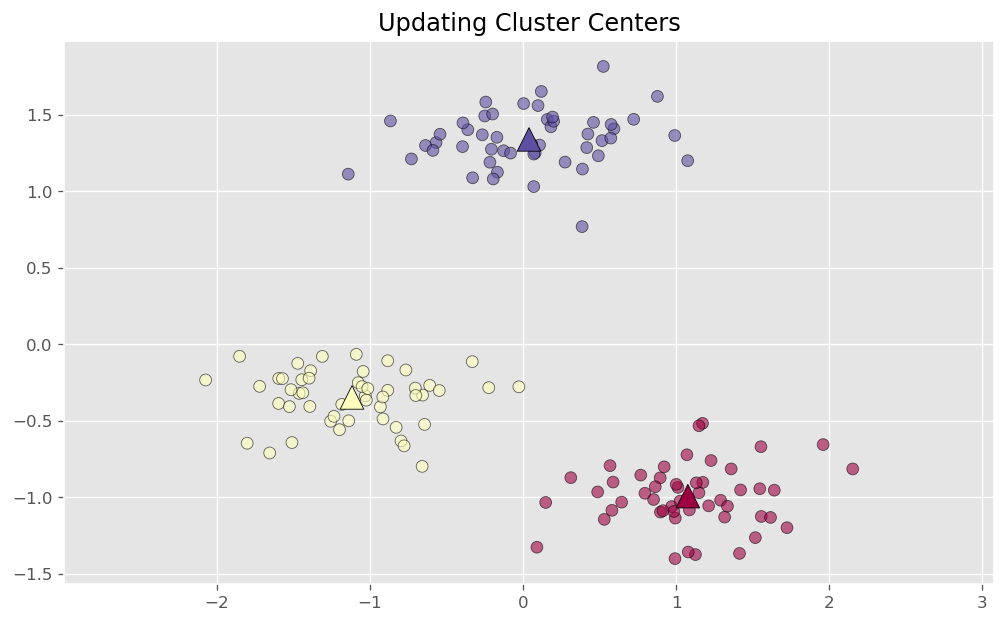

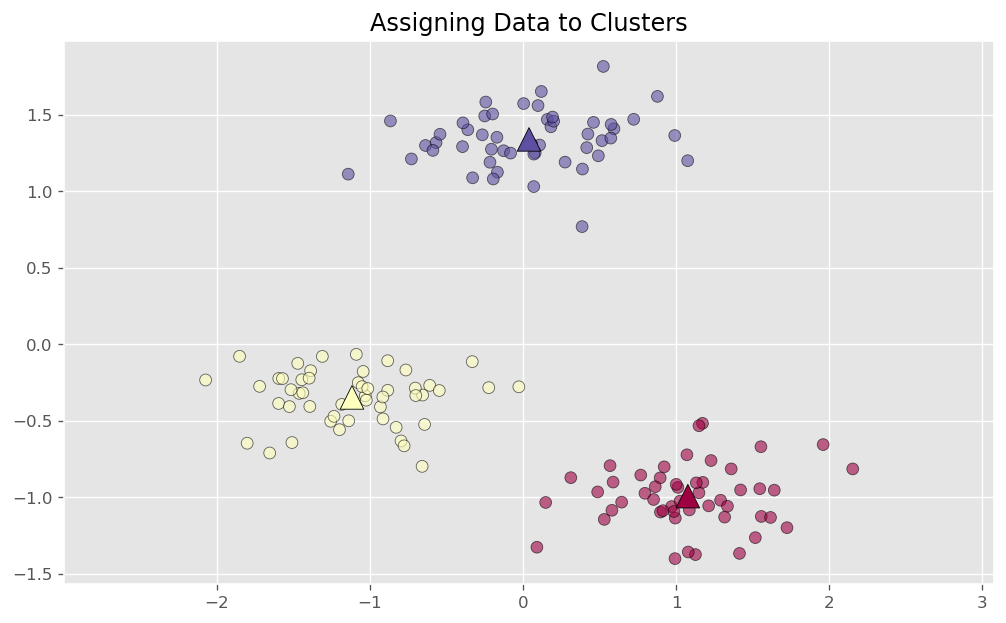

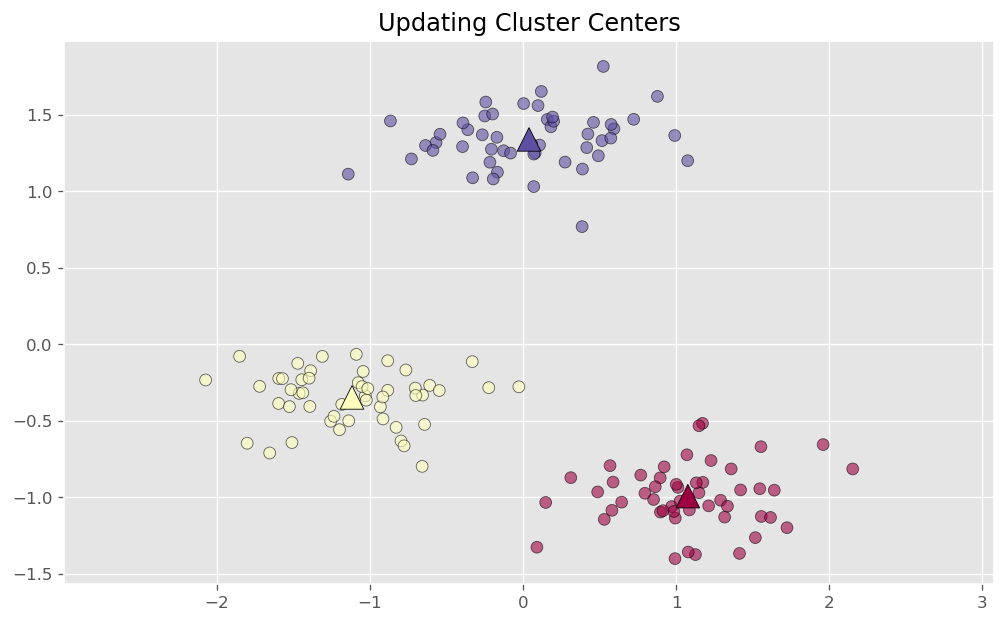

In [27]:
# Normalize X
mu = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mu) / std

# plot kmeans steps
initial_centroids = np.array([[1.1, -0.2], [-2.0, -0.5], [-1.8, -0.1]])
cluster_ids, centroids = plot_kmeans(X, initial_centroids)

### Step by step demo

In [28]:
plot_kmeans_interactive();

interactive(children=(IntSlider(value=0, description='frame', max=50), IntSlider(value=4, description='K', max…

## Choosing number of clusters

- One of the **short-comings** of K-means is that we have to specify the number of clusters, which we often don't know *apriori*. 

In [29]:
def update_kmeans_plot(K):
    # cluster data
    kmeans = KMeans(n_clusters=K, random_state=42)
    labels = kmeans.fit_predict(X)
    
    # show clustering result
    plt.scatter(X[:, 0], X[:, 1], edgecolors='k', s=50, c=labels, alpha=0.8)
    plt.title("K = {}, Cost = {:.2f}".format(K, kmeans.inertia_))
    plt.axis('equal')
    

K = widgets.IntSlider(value=2, min=1, max=X.shape[0], step=1, description='K:')
widgets.interact(update_kmeans_plot, K=K);

interactive(children=(IntSlider(value=2, description='K:', max=150, min=1), Output()), _dom_classes=('widget-i…

### The Elbow Method

The Elbow method is a "rule-of-thumb" approach to finding the optimal number of clusters. Here, we look at the cluster dispersion for different values of k:

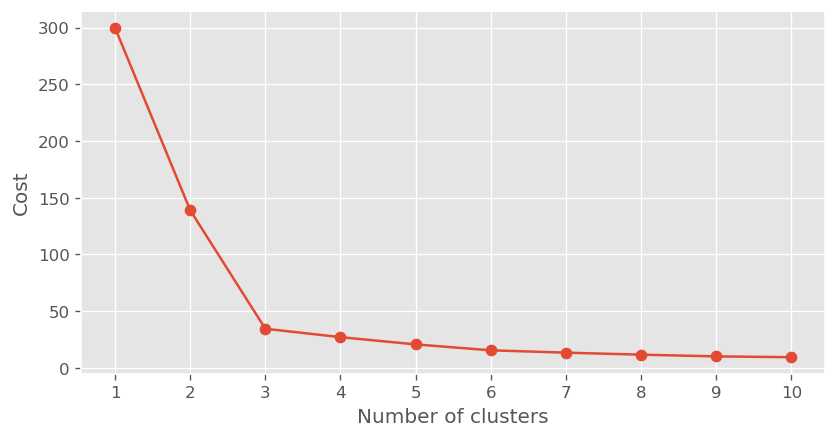

In [30]:
costs = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    costs.append(km.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), costs, marker='o')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

## Some Applications

<div class="alert alert-success">
    <b>Digits Clustering</b>:
     <ul>
      <li>
      Perform K-means clustering on the digits data, searching for ten clusters.
Visualize the cluster centers as images (i.e. reshape each to 8x8 and use
``plt.imshow``). Do the clusters seem to be correlated with particular digits?
      </li>
      <li>
      Visualize the projected digits, use the cluster labels as the color.  What do you notice?
      </li>
    </ul>
</div>

(10, 64)


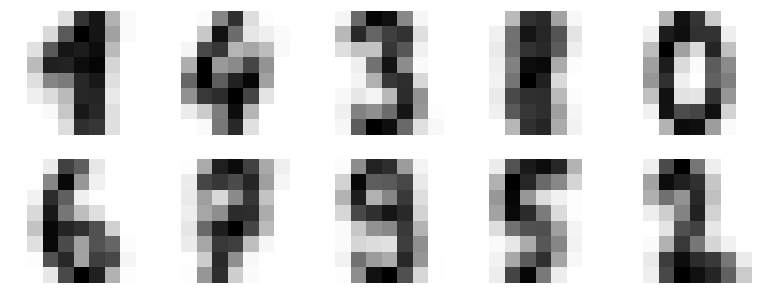

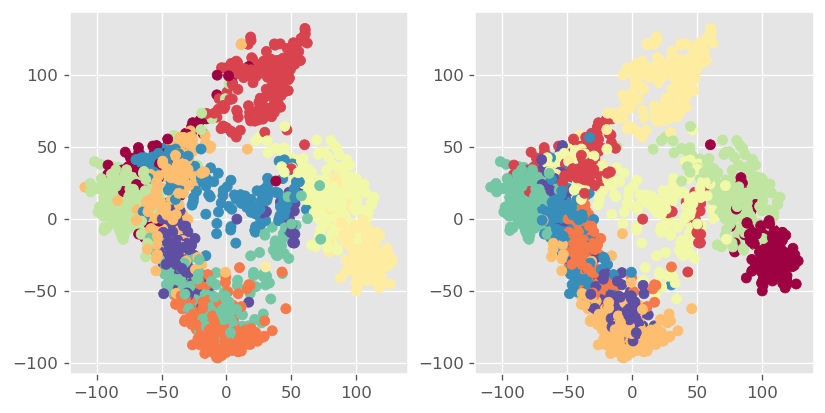

In [31]:
# load digits dataset
from sklearn.datasets import load_digits
digits = load_digits()


# cluster digits to 10 clusters
kmeans = KMeans(n_clusters=10)
cluster_ids = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)


# visualize the cluster centers
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
    ax.grid(False)
    ax.axis('off')


# visualize the projected data
from sklearn.manifold import Isomap
X_iso = Isomap(n_neighbors=10).fit_transform(digits.data)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(X_iso[:, 0], X_iso[:, 1], c=cluster_ids)
ax[1].scatter(X_iso[:, 0], X_iso[:, 1], c=digits.target);

<div class="alert alert-success">
    <b>Image Compression using k-means</b>:
     <ul>
      <li>
          See Piazza for a complete defenition of this task. 
      </li>
    </ul>
</div>

In [32]:
# read image

img = scipy.misc.imread("data/bird_small.png")

# compress using k-means
K = 16
img_compressed = compress(img, K=K)

# plot original image
plt.subplot(121)
plt.imshow(img)
plt.title("Original Image")
plt.grid(False)

# plot compressed image
plt.subplot(122)
plt.imshow(img_compressed)
plt.title("Compressed Image (K = {})".format(K))
plt.grid(False)

AttributeError: module 'scipy.misc' has no attribute 'imread'

In [ ]:
%matplotlib nbagg

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

A = img.reshape((img.shape[0] * img.shape[1], 3))

ax.scatter3D(A[:2000, 0], A[:2000, 1], A[:2000, 2], color=A[:2000]/255.0);

### Bad clustering examples

In [ ]:
plt.figure(figsize=(10, 10))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)


# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', c=y_pred)
plt.title("Incorrect Number of Blobs", size='medium')


# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], edgecolors='k', c=y_pred)
plt.title("Anisotropicly Distributed Blobs", size='medium')


# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)
plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], edgecolors='k', c=y_pred)
plt.title("Unequal Variance", size='medium')


# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_filtered)
plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], edgecolors='k', c=y_pred)
plt.title("Unevenly Sized Blobs", size='medium')
plt.show()

## Other Clustering Routines

The following are two well-known clustering algorithms. 

- `sklearn.cluster.KMeans`: <br/>
    The simplest, yet effective clustering algorithm. Needs to be provided with the
    number of clusters in advance, and assumes that the data is normalized as input
    (but use a PCA model as preprocessor).
- `sklearn.cluster.MeanShift`: <br/>
    Can find better looking clusters than KMeans but is not scalable to high number of samples.
- `sklearn.cluster.DBSCAN`: <br/>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).
- `sklearn.cluster.AffinityPropagation`: <br/>
    Clustering algorithm based on message passing between data points.
- `sklearn.cluster.SpectralClustering`: <br/>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.
- `sklearn.cluster.Ward`: <br/>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).

Of these, Ward, SpectralClustering, DBSCAN and Affinity propagation can also work with precomputed similarity matrices.

For more information, please see [here](http://scikit-learn.org/stable/modules/clustering.html#clustering)

<img src="http://www.snrazavi.ir/imgs/cluster_comparison.png" width="100%"/>